# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import f1_score
import joblib


# Data analysis

In [2]:
path="/Users/z3542407/Documents/GitHub/beforepay/data/loan_default_1_smpl.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
1,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
2,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
3,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
4,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0


In [5]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47728 entries, 0 to 47727
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         47728 non-null  int64  
 1   year                       47728 non-null  int64  
 2   loan_limit                 46637 non-null  object 
 3   Gender                     47728 non-null  object 
 4   approv_in_adv              47446 non-null  object 
 5   loan_type                  47728 non-null  object 
 6   loan_purpose               47681 non-null  object 
 7   Credit_Worthiness          47728 non-null  object 
 8   open_credit                47728 non-null  object 
 9   business_or_commercial     47728 non-null  object 
 10  loan_amount                47728 non-null  int64  
 11  rate_of_interest           44799 non-null  float64
 12  Interest_rate_spread       44781 non-null  float64
 13  Upfront_charges            43550 non-null  flo

In [7]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


dtir1                        4455
Upfront_charges              4178
income                       3256
Interest_rate_spread         2947
rate_of_interest             2929
property_value               1241
LTV                          1241
loan_limit                   1091
approv_in_adv                 282
loan_purpose                   47
Neg_ammortization              44
age                            18
submission_of_application      18
term                           12
total_units                     0
Region                          0
co-applicant_credit_type        0
Credit_Score                    0
Security_Type                   0
credit_type                     0
Status                          0
ID                              0
Secured_by                      0
occupancy_type                  0
construction_type               0
year                            0
interest_only                   0
loan_amount                     0
business_or_commercial          0
open_credit   

Class Distribution in Training Data:
 Status
0    44781
1     2947
Name: count, dtype: int64


/var/folders/s5/tgdwwwkx5rzc0vlfn_7dchlr0000gq/T/ipykernel_22652/2874218084.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


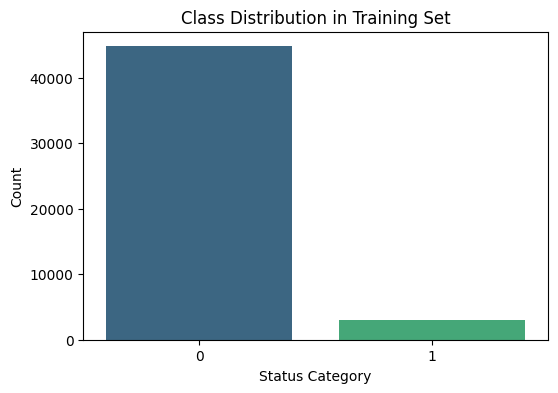

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['Status'].value_counts()
print("Class Distribution in Training Data:\n", class_counts)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Status Category")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.show()

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='median')  # Replace NaNs with the median
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
cat_imputer = SimpleImputer(strategy='most_frequent')  # Replace NaNs with the most frequent value
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
print(df.isnull().sum().sort_values(ascending=False))


ID                           0
Credit_Score                 0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
co-applicant_credit_type     0
year                         0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
property_value               0
lump_sum_payment             0
interest_only                0
Neg_ammortization            0
term                         0
Upfront_charges              0
Interest_rate_spread         0
rate_of_interest             0
loan_amount                  0
business_or_commercial       0
open_credit                  0
Credit_Worthiness            0
loan_purpose                 0
loan_type                    0
approv_in_adv                0
Gender                       0
loan_lim

In [10]:
df=df.drop(columns=['ID'])

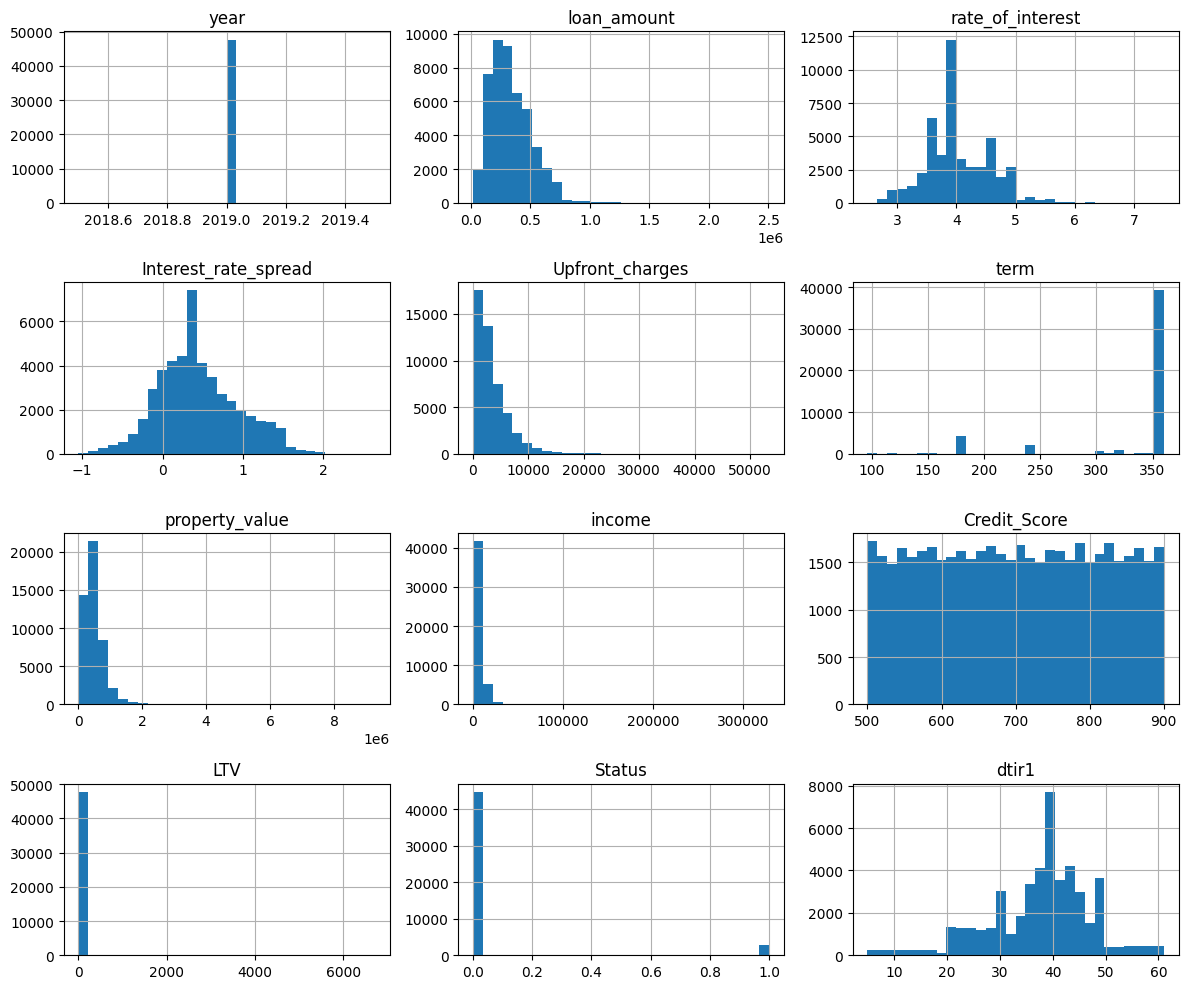

In [11]:
# Histogram of numerical features
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Upfront_charges'] = np.log1p(df['Upfront_charges'] + 1)
df['income'] = np.log1p(df['income'] + 1)
df['loan_amount'] = np.log1p(df['loan_amount'] + 1)
df['property_value'] = np.log1p(df['property_value'] + 1)

df['Upfront_charges'] = scaler.fit_transform(df[['Upfront_charges']])
df['income'] = scaler.fit_transform(df[['income']])
df['loan_amount'] = scaler.fit_transform(df[['loan_amount']])
df['property_value'] = scaler.fit_transform(df[['property_value']])


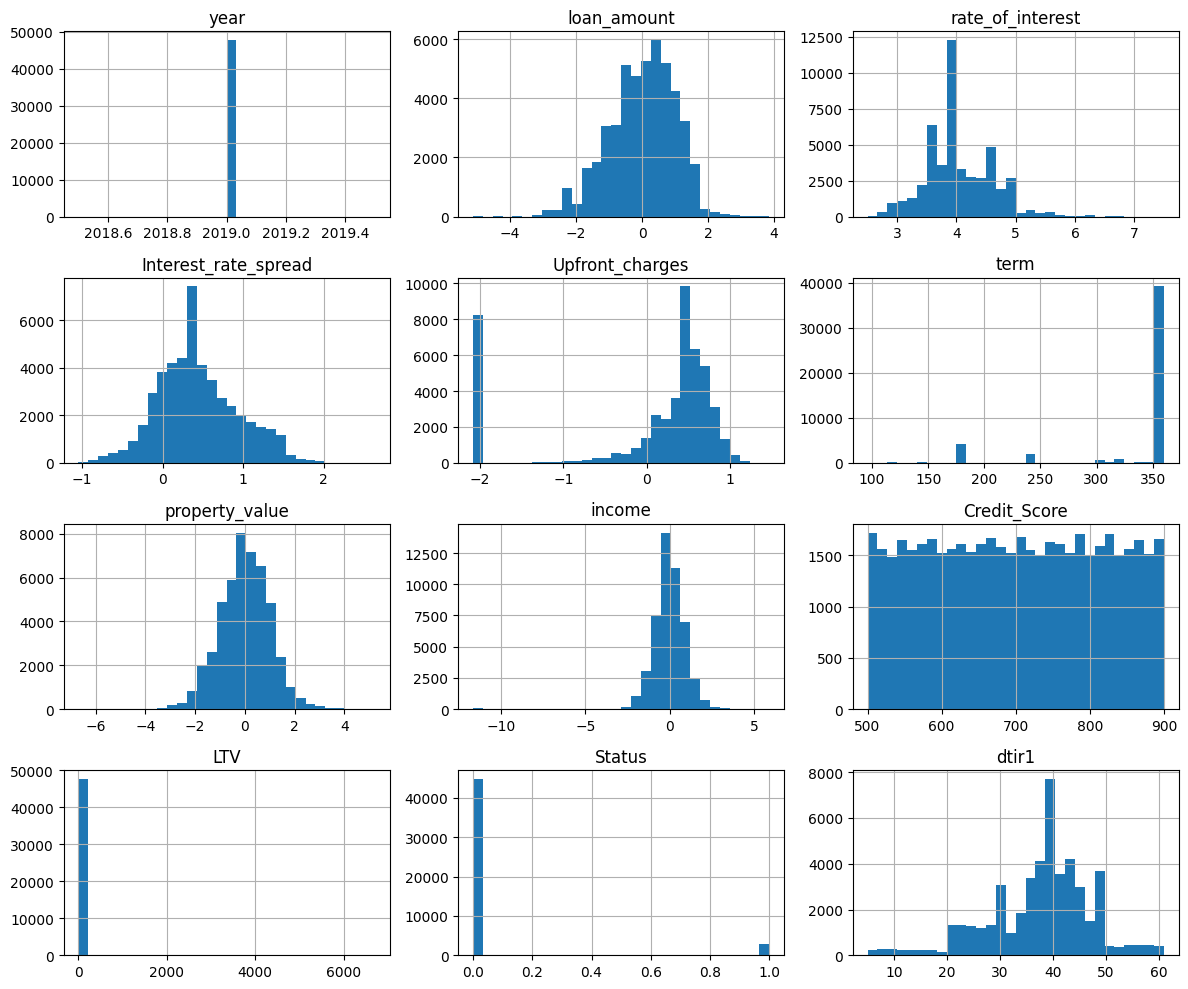

In [13]:
# Histogram of numerical features
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


In [14]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])  # Convert labels to numeric
df = df.dropna(subset=['Status'])  # Drop rows where 'Status' has NaN
X = df.drop(columns=['Status'])  # Assuming 'Status' is the target variable
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

Class Distribution in Training Data:
 Status
0    31346
1     2063
Name: count, dtype: int64


/var/folders/s5/tgdwwwkx5rzc0vlfn_7dchlr0000gq/T/ipykernel_22652/2469332829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


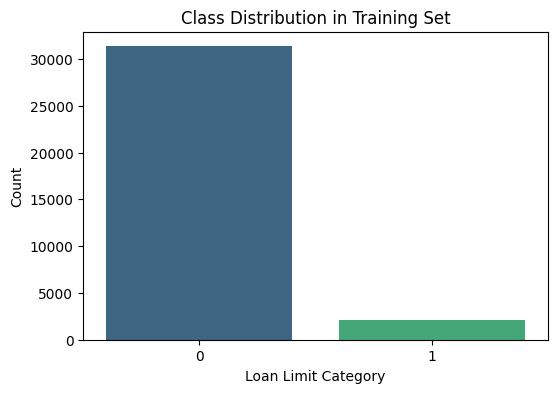

In [15]:
class_counts = y_train.value_counts()
print("Class Distribution in Training Data:\n", class_counts)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Loan Limit Category")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.show()


In [16]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [17]:
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed


In [20]:
!pwd

/Users/z3542407/Documents/GitHub/beforepay/notebook


/Users/z3542407/anaconda3/envs/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


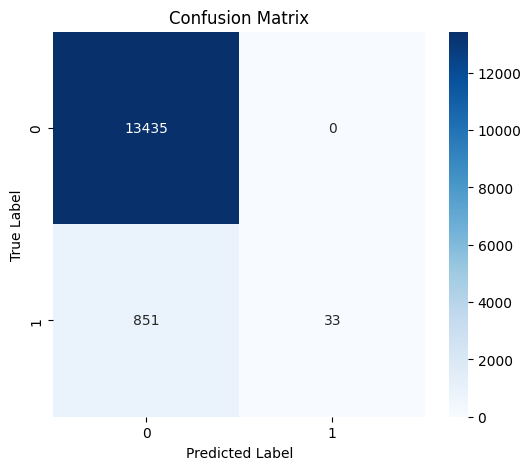

Precision (Weighted): 0.9441
Recall (Weighted): 0.9406
Class 0: Precision = 0.9404, Recall = 1.0000
Class 0: F1-Measure = 0.9693
Class 1: Precision = 1.0000, Recall = 0.0373
Class 1: F1-Measure = 0.0720


In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

precision = precision_score(y_test, y_pred, average='weighted')  # or 'macro', 'micro'
recall = recall_score(y_test, y_pred, average='weighted')  # or 'macro', 'micro'
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')

classes = model.classes_
for idx, label in enumerate(classes):
    class_precision = precision_score(y_test, y_pred, labels=[label], average=None)[0]
    class_recall = recall_score(y_test, y_pred, labels=[label], average=None)[0]
    print(f"Class {label}: Precision = {class_precision:.4f}, Recall = {class_recall:.4f}")
    class_f1 = f1_score(y_test, y_pred, labels=[label], average=None)[0]
    print(f"Class {label}: F1-Measure = {class_f1:.4f}")



In [27]:
model = lgb.LGBMClassifier(
    n_estimators=50,
    random_state=42,
    is_unbalance=True
)
model.fit(X_train, y_train)
joblib.dump(model, "/Users/z3542407/Documents/GitHub/beforepay/models/beforepay_model.pkl")
print("Model saved successfully!")


[LightGBM] [Info] Number of positive: 2063, number of negative: 31346
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1854
[LightGBM] [Info] Number of data points in the train set: 33409, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061750 -> initscore=-2.720925
[LightGBM] [Info] Start training from score -2.720925
Model saved successfully!


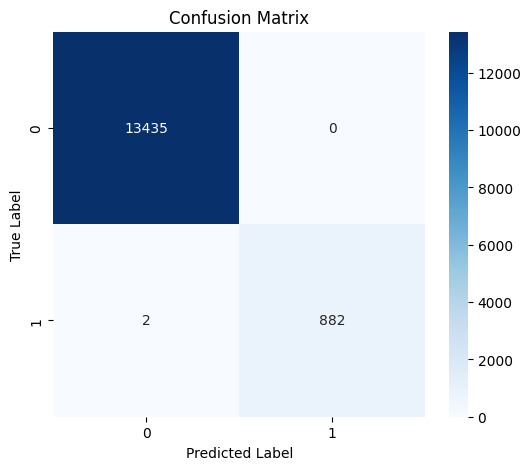

Precision (Weighted): 0.9999
Recall (Weighted): 0.9999
Class 0: Precision = 0.9999, Recall = 1.0000
Class 0: F1-Measure = 0.9999
Class 1: Precision = 1.0000, Recall = 0.9977
Class 1: F1-Measure = 0.9989


In [28]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

precision = precision_score(y_test, y_pred, average='weighted')  # or 'macro', 'micro'
recall = recall_score(y_test, y_pred, average='weighted')  # or 'macro', 'micro'
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')

classes = model.classes_
for idx, label in enumerate(classes):
    class_precision = precision_score(y_test, y_pred, labels=[label], average=None)[0]
    class_recall = recall_score(y_test, y_pred, labels=[label], average=None)[0]
    print(f"Class {label}: Precision = {class_precision:.4f}, Recall = {class_recall:.4f}")
    class_f1 = f1_score(y_test, y_pred, labels=[label], average=None)[0]
    print(f"Class {label}: F1-Measure = {class_f1:.4f}")


Top 10 Features by Importance:

                 Feature  Importance
28                   LTV         263
31                 dtir1         157
11  Interest_rate_spread         153
12       Upfront_charges         138
22                income         122
9            loan_amount         107
24          Credit_Score         101
17        property_value          87
23           credit_type          52
5           loan_purpose          46


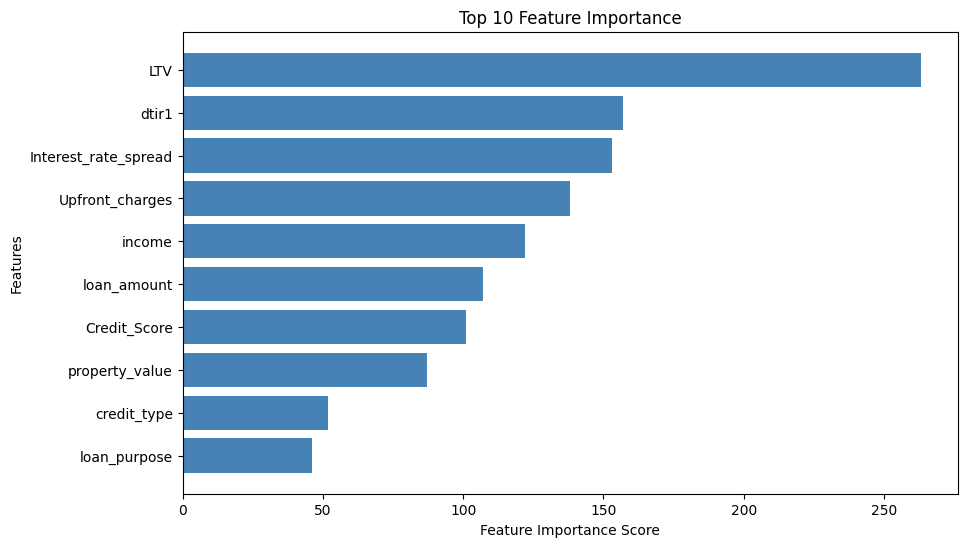

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance values and feature names
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 features
print("Top 10 Features by Importance:\n")
print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1], color='steelblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance")
plt.show()


/Users/z3542407/anaconda3/envs/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/z3542407/anaconda3/envs/myenv/lib/python3.13/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


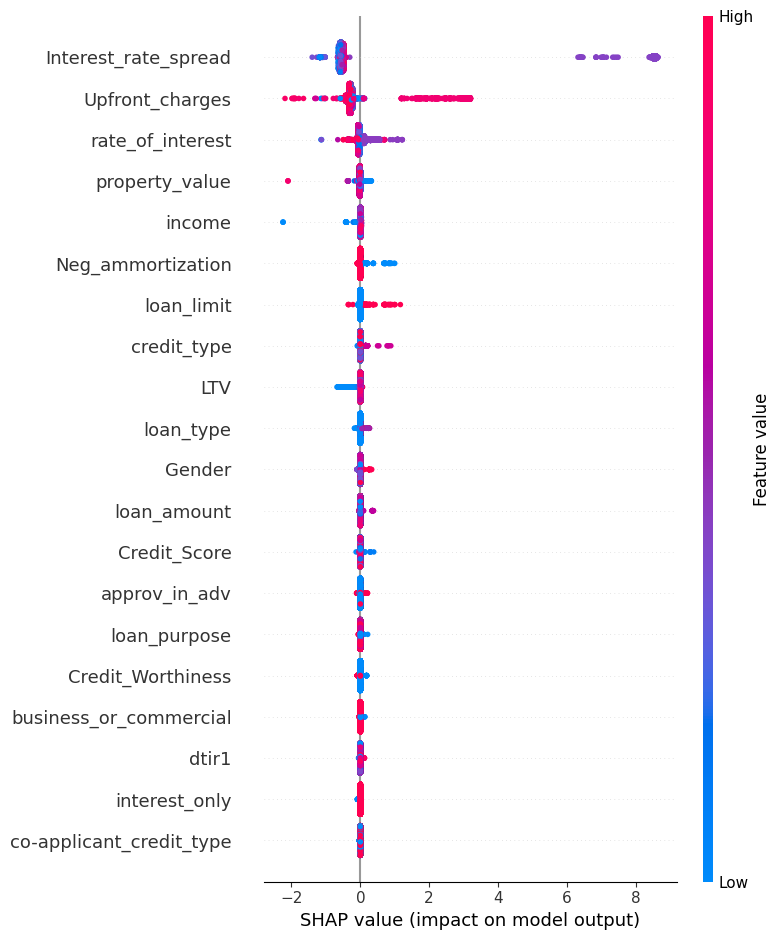

In [24]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)